**GAIZKIA ADELINE ATMAKA**

**2501972493 LA05**

**FINAL EXAM TEXT MINING (NO. 2B)**

Link Video:https://www.youtube.com/playlist?list=PLgEV6IOXdLB9B6nS4YW68-9W8oyTpVG08

Import library

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import re
import string
import nltk
from nltk.tokenize import sent_tokenize, word_tokenize
from nltk.corpus import stopwords
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score, silhouette_samples
from sklearn.preprocessing import MinMaxScaler
from sklearn.feature_extraction.text import TfidfVectorizer
%matplotlib inline

nltk.download('punkt')
nltk.download('stopwords')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

Load data from CSV

In [ ]:
df = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/Text Mining/Final Exam/B/data_2B.csv')
df

,Unnamed: 0,index,URL,Date,Tweet,ID,Username,Replies,Reetweets,Likes,Quotes,conversationId,Language,Links,Media,Retweeted Tweet,Bookmarks
0,0,3538,https://twitter.com/ammiiik/status/16580105902...,2023-05-15 07:25:03+00:00,tutup aja ga si banknya drpd nyusahin nasabah ...,1658010590240206855,ammiiik,1,0,0,1,1658010590240206855,in,NaN,https://pbs.twimg.com/media/FwJv17DakAAoSlW?fo...,NaN,0
1,1,3905,https://twitter.com/kumparan/status/1657955521...,2023-05-15 03:46:14+00:00,Saham PT Bank Syariah Indonesia Tbk (BRIS) ata...,1657955521356529665,kumparan,0,2,0,0,1657955521356529665,in,https://kumparan.com/kumparanbisnis/saham-bsi-...,NaN,NaN,0
2,2,1621,https://twitter.com/0xdermawan/status/16584081...,2023-05-16 09:44:44+00:00,"@druwixon @bankbsi_id Oh iya sih, Saya tadi ju...",1658408131272278021,0xdermawan,0,0,0,0,1658285791486046208,in,NaN,NaN,NaN,0
3,3,4889,https://twitter.com/zaqyyyyyyyyy/status/165768...,2023-05-14 09:32:50+00:00,@RochmatPurwanto @bankbsi_id @bank_indonesia B...,1657680361080639488,zaqyyyyyyyyy,0,1,0,0,1657217322447425538,in,NaN,NaN,NaN,0
4,4,20394,https://twitter.com/Andywahyudi07/status/16562...,2023-05-10 09:37:22+00:00,"Min, layanan di @bankbsi_id udah bisa belom ya?",1656231946576625666,Andywahyudi07,1,0,0,0,1656231946576625666,in,NaN,NaN,NaN,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6095,6095,20532,https://twitter.com/Pratiwianindit6/status/165...,2023-05-10 09:11:06+00:00,@bankbsi_id @glhprmshl Ngga bisa semua min.. m...,1656225339671216128,Pratiwianindit6,1,0,0,0,1656224560537292800,in,NaN,NaN,NaN,0
6096,6096,20108,https://twitter.com/bukananak_DPRr/status/1656...,2023-05-10 10:24:56+00:00,"@bankbsi_id INGETIN DIRI LU SNDIRI AJA, SMPE S...",1656243917971673088,bukananak_DPRr,0,0,0,0,1655777758180708355,in,NaN,NaN,NaN,0
6097,6097,22997,https://twitter.com/rizki_mizuki/status/165592...,2023-05-09 13:35:53+00:00,Asli dah gue ogah pake BSI mana atm susah dica...,1655929585446576130,rizki_mizuki,1,0,0,0,1655929585446576130,in,NaN,NaN,NaN,0
6098,6098,1214,https://twitter.com/Pohonpir/status/1658458527...,2023-05-16 13:05:00+00:00,khairunnisa salma ipk 4 selasa aku milikmu hap...,1658458527411863553,Pohonpir,0,0,0,0,1658458527411863553,in,https://twitter.com/PohonKelapa13/status/16562...,NaN,NaN,0


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6100 entries, 0 to 6099
Data columns (total 17 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Unnamed: 0       6100 non-null   int64  
 1   index            6100 non-null   int64  
 2   URL              6100 non-null   object 
 3   Date             6100 non-null   object 
 4   Tweet            6100 non-null   object 
 5   ID               6100 non-null   int64  
 6   Username         6100 non-null   object 
 7   Replies          6100 non-null   int64  
 8   Reetweets        6100 non-null   int64  
 9   Likes            6100 non-null   int64  
 10  Quotes           6100 non-null   int64  
 11  conversationId   6100 non-null   int64  
 12  Language         6100 non-null   object 
 13  Links            258 non-null    object 
 14  Media            578 non-null    object 
 15  Retweeted Tweet  0 non-null      float64
 16  Bookmarks        6100 non-null   int64  
dtypes: float64(1),

In [ ]:
df.describe()

,Unnamed: 0,index,ID,Replies,Reetweets,Likes,Quotes,conversationId,Retweeted Tweet,Bookmarks
count,6100.000000,6100.000000,6.100000e+03,6100.000000,6100.000000,6100.000000,6100.000000,6.100000e+03,0.0,6100.000000
mean,3049.500000,12150.695246,1.657032e+18,1.219016,1.718689,4.721148,0.570820,1.656569e+18,NaN,0.567541
std,1761.062653,7024.146133,7.950357e+14,11.621634,95.703677,210.186777,31.832996,7.175436e+15,NaN,29.244095
min,0.000000,0.000000,1.655862e+18,0.000000,0.000000,0.000000,0.000000,1.192636e+18,NaN,0.000000
25%,1524.750000,6029.250000,1.656332e+18,0.000000,0.000000,0.000000,0.000000,1.656112e+18,NaN,0.000000
50%,3049.500000,12162.500000,1.656905e+18,0.000000,0.000000,0.000000,0.000000,1.656633e+18,NaN,0.000000
75%,4574.250000,18150.000000,1.657549e+18,1.000000,0.000000,0.000000,0.000000,1.657217e+18,NaN,0.000000
max,6099.000000,24397.000000,1.658981e+18,883.000000,7403.000000,15852.000000,2484.000000,1.658975e+18,NaN,1904.000000


In [ ]:
df.isnull().sum()

Unnamed: 0            0
index                 0
URL                   0
Date                  0
Tweet                 0
ID                    0
Username              0
Replies               0
Reetweets             0
Likes                 0
Quotes                0
conversationId        0
Language              0
Links              5842
Media              5522
Retweeted Tweet    6100
Bookmarks             0
dtype: int64

In [ ]:
pd.value_counts(df.Date)

Date
2023-05-14 00:51:41+00:00    2
2023-05-16 03:45:05+00:00    2
2023-05-13 03:28:09+00:00    2
2023-05-11 02:11:12+00:00    2
2023-05-10 13:36:06+00:00    2
                            ..
2023-05-14 00:02:29+00:00    1
2023-05-09 22:43:16+00:00    1
2023-05-11 08:45:45+00:00    1
2023-05-12 05:49:18+00:00    1
2023-05-17 14:06:36+00:00    1
Name: count, Length: 6053, dtype: int64

In [ ]:
# Remove kolom yang tidak diperlukan
df = df[['Tweet']]

stop_words = set(stopwords.words('indonesian'))

def preprocess_text(text):
    text = text.lower()  # Case folding
    text = re.sub(r'http\S+|www\S+|https\S+', '', text, flags=re.MULTILINE)  # Remove URL
    text = re.sub(r'@\w+', '', text)  # Remove mention
    text = re.sub(r'#\w+', '', text)  # Remove hashtag
    text = re.sub(r'\d+', '', text)  # Remove angka
    text = re.sub(r'[^\w\s]', '', text)  # Remove tanda baca
    text = ' '.join([word for word in text.split() if word not in stop_words])  # Remove stopwords
    return text

df['Cleaned_Tweet'] = df['Tweet'].apply(preprocess_text)
df

<ipython-input-33-a6bf1db40350>:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Cleaned_Tweet'] = df['Tweet'].apply(preprocess_text)


,Tweet,Cleaned_Tweet
0,tutup aja ga si banknya drpd nyusahin nasabah ...,tutup aja ga si banknya drpd nyusahin nasabah
1,Saham PT Bank Syariah Indonesia Tbk (BRIS) ata...,saham pt bank syariah indonesia tbk bris bsi m...
2,"@druwixon @bankbsi_id Oh iya sih, Saya tadi ju...",oh iya sih lihat timeline gak apa² om utk halh...
3,@RochmatPurwanto @bankbsi_id @bank_indonesia B...,laporkan sertakan bukti lampiran surat ojk tem...
4,"Min, layanan di @bankbsi_id udah bisa belom ya?",min layanan udah belom ya
...,...,...
6095,@bankbsi_id @glhprmshl Ngga bisa semua min.. m...,ngga min ambil duit teller ngga
6096,"@bankbsi_id INGETIN DIRI LU SNDIRI AJA, SMPE S...",ingetin lu sndiri aja smpe skrng bsi mobile bl...
6097,Asli dah gue ogah pake BSI mana atm susah dica...,asli dah gue ogah pake bsi atm susah dicari ta...
6098,khairunnisa salma ipk 4 selasa aku milikmu hap...,khairunnisa salma ipk selasa milikmu happy bir...


Split data

In [ ]:
from sklearn.model_selection import train_test_split

train_data, test_data = train_test_split(df['Cleaned_Tweet'],test_size = 0.2, random_state = 42)

Vektorisasi

In [ ]:
vectorizer = TfidfVectorizer()
X = vectorizer.fit_transform(train_data)

In [ ]:
# Mencari nilai k untuk clustering menggunakan silhouette score
distortions = []
k_values = range(2, 10)

for k in k_values:
    kmeans = KMeans(n_clusters=k, init='k-means++', random_state=42)
    clusters = kmeans.fit_predict(X)
    silhouette_avg = silhouette_score(X, clusters)
    print(f'k={k}, Silhouette Score={silhouette_avg}')
    distortions.append(kmeans.inertia_)

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


k=2, Silhouette Score=0.005323703785818519


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


k=3, Silhouette Score=0.007202234311988375


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


k=4, Silhouette Score=0.0092335101473154


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


k=5, Silhouette Score=0.010958747835760488


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


k=6, Silhouette Score=0.011550808542101556


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


k=7, Silhouette Score=0.01090663076817074


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


k=8, Silhouette Score=0.012552888172169045


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


k=9, Silhouette Score=0.013434411117476393


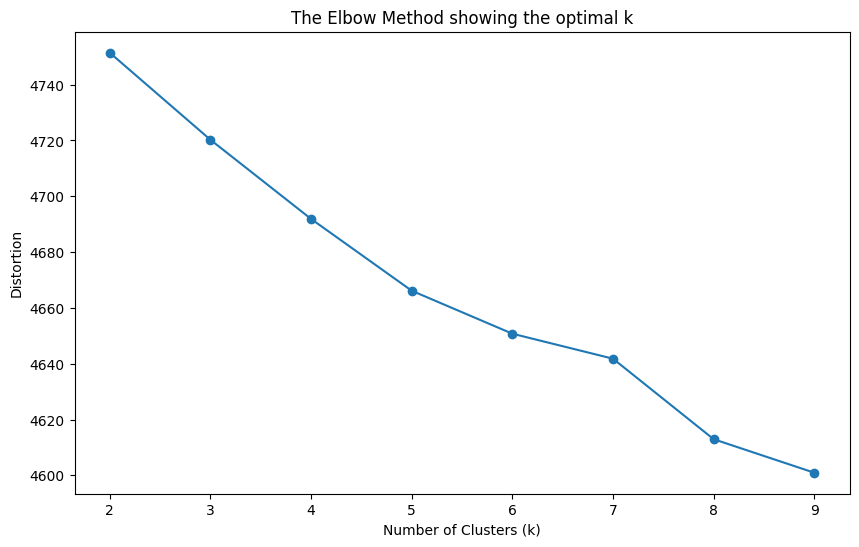

In [ ]:
# Menggunakan elbow
plt.figure(figsize=(10, 6))
plt.plot(k_values, distortions, marker='o')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Distortion')
plt.title('The Elbow Method showing the optimal k')
plt.show()

In [ ]:
kmeans.cluster_centers_

array([[0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       ...,
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.00184401, 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.        , 0.        , 0.        , ..., 0.00033111, 0.00033111,
        0.        ]])

In [ ]:
kmeans.labels_

array([5, 8, 0, ..., 4, 4, 4], dtype=int32)

In [ ]:
len(kmeans.labels_)

4880

In [ ]:
len(df)

6100

Length dari df dan kmeans.labels_ berbeda maka perlu di proses terlebih dahulu agar length nya sesuai

In [ ]:
# Memotong data
df = df.iloc[:len(kmeans.labels_)]

# Menambahkan kolom Cluster ke DataFrame
df['Cluster'] = kmeans.labels_

# Mereset_index
df.reset_index(drop=True, inplace=True)

<ipython-input-47-afc82ed75f6b>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Cluster'] = kmeans.labels_


Length data yang berbeda ini bisa disebabkan oleh

**Penyusutan data pada proses clustering**


Proses clustering seperti KMeans dapat menghasilkan jumlah cluster yang lebih sedikit dari jumlah titik data yang diberikan. Misalnya, pada data sebanyak 6100, KMeans bisa saja hanya mengenali 4880 cluster sehingga kmeans.labels_ hanya akan memiliki panjang 4880.


**Pengelompokan data yang tidak sempurna**

Algoritma clustering bisa tidak dapat mengelompokkan semua titik data dengan benar, yang menyebabkan beberapa titik data tidak memiliki label cluster yang sesuai.

In [ ]:
kmeans.inertia_


4600.948182927295

In [ ]:
df

,Tweet,Cleaned_Tweet,Cluster
0,tutup aja ga si banknya drpd nyusahin nasabah ...,tutup aja ga si banknya drpd nyusahin nasabah,5
1,Saham PT Bank Syariah Indonesia Tbk (BRIS) ata...,saham pt bank syariah indonesia tbk bris bsi m...,8
2,"@druwixon @bankbsi_id Oh iya sih, Saya tadi ju...",oh iya sih lihat timeline gak apa² om utk halh...,0
3,@RochmatPurwanto @bankbsi_id @bank_indonesia B...,laporkan sertakan bukti lampiran surat ojk tem...,6
4,"Min, layanan di @bankbsi_id udah bisa belom ya?",min layanan udah belom ya,3
...,...,...,...
4875,@ch_chotimah2 @bankbsi_id Tampilin presentasi ...,tampilin presentasi dr laptop proyektor aja ba...,8
4876,@bankbsi_id entah sampai kapaaaaan https://t.c...,kapaaaaan,4
4877,@bankbsi_id Bohong bohong bohong internet bank...,bohong bohong bohong internet banking blm,4
4878,@bankbsi_id #BankBSIDzolim hari ke 4 loh 🙄🙄🙄🙄...,loh udah rukiyah nya ruangan server nya kaya d...,4


In [ ]:
df['Cluster'].value_counts()

Cluster
4    2307
8     704
0     498
7     369
5     310
3     272
6     178
2     151
1      91
Name: count, dtype: int64

In [ ]:
# Clustering berdasarkan nilai k terbaik yang didapat dari silhouette score dan elbow method
optimal_k = 9

kmeans = KMeans(n_clusters=optimal_k, random_state=42)
clusters = kmeans.fit_predict(X)
df['Cluster'] = clusters

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
<ipython-input-50-d794f9e74361>:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Cluster'] = clusters


In [ ]:
# Top words untuk tiap cluster
def get_top_words(cluster_num, n_terms=10):
    cluster_tweets = df[df['Cluster'] == cluster_num]['Cleaned_Tweet']
    all_words = ' '.join(cluster_tweets)
    word_freq = pd.Series(all_words.split()).value_counts()
    top_words = word_freq.head(n_terms)
    return top_words

for i in range(optimal_k):
    print(f'Cluster {i} top words:')
    print(get_top_words(i))
    print()

Cluster 0 top words:
bsi     213
bank    131
ya       66
yg       60
udah     59
aja      54
gak      53
ga       53
min      51
nya      46
Name: count, dtype: int64

Cluster 1 top words:
bsi      38
bank     24
ga       14
kak      11
saldo    11
udah     10
min      10
ya        9
kena      8
cek       8
Name: count, dtype: int64

Cluster 2 top words:
bsi     59
bank    49
ya      23
udah    21
yg      18
aja     16
ga      16
nya     15
atm     15
min     15
Name: count, dtype: int64

Cluster 3 top words:
bsi      80
bank     52
ga       35
ya       32
kak      28
yg       28
min      27
udah     25
atm      24
saldo    23
Name: count, dtype: int64

Cluster 4 top words:
bsi     864
bank    608
ya      298
yg      276
aja     245
udah    242
ga      234
atm     226
kak     218
min     195
Name: count, dtype: int64

Cluster 5 top words:
bsi     124
bank     87
yg       48
ga       45
ya       37
aja      33
udah     32
kak      31
nya      29
min      29
Name: count, dtype: int64

Cl

# Persona Analysis

In [ ]:
for i in range(optimal_k):
    tweets_in_cluster = df[df['Cluster'] == i]
    print(f'Cluster {i} has {len(tweets_in_cluster)} tweets')
    print(tweets_in_cluster['Tweet'].head())


Cluster 0 has 498 tweets
2     @druwixon @bankbsi_id Oh iya sih, Saya tadi ju...
6     @bankbsi_id Cc lagi Uda @paijodirajo Ada utas ...
12    @bankbsi_id Masih gak bisa deh perasaan sampe ...
24    Akun penipu. Hati2 nasabah @bankbsi_id https:/...
29    @bankbsi_id Tolong pak @erickthohir,@AryaSinul...
Name: Tweet, dtype: object
Cluster 1 has 91 tweets
55     Haduh haduh kemarin mbankingnya @bankbsi_id yg...
135                               Gimana ini @bankbsi_id
160    @Hilmi28 Semoga terselesaikan dengan segera pe...
222    @finauraz @bankbsi_id Oalah bs gt ya. Kebetula...
233              @bankbsi_id jadi mbanking blm bisa yaa?
Name: Tweet, dtype: object
Cluster 2 has 151 tweets
74     Serius tanya ini Bank BSI kapan NORMAL nya? Di...
103              @ekokuntadhi1 Bank BSI auto masuk Surga
123    @bankbsi_id Ber komitmen ber komitmen tok ae k...
139    @sefvie_risti @bankbsi_id Sampe skrg blm bisa ...
190    @selarizal @wahyufandi_ @ardfauliya @bankbsi_i...
Name: Tweet, dtype: ob

Analisis berdasarkan top words dan ciri khas tweet

Cluster
1.   Berisi akun penipuan yang mengatasnamakan bank BSI
2. Berisi keluhan terkait mbanking
3. Berisi keluhan terhadap bank BSI
4. Berisi pertanyaan terhadap bank BSi
5. Berisi keluhan masalah transfer
6. Berisi kekecewaan user gagal transfer dan tidak bisa akses saldo
7. Berisi keluhan user terhadap bank BSi
8. Berisi keluhan user atm
9. Berisi solusi untuk masalah ransomware



# Topic Extraction

In [ ]:
from sklearn.decomposition import LatentDirichletAllocation

num_topics = 5

lda = LatentDirichletAllocation(n_components=num_topics, random_state=42)
lda_topics = lda.fit_transform(X)

# Top words tiap topik
def display_topics(model, feature_names, no_top_words):
    for topic_idx, topic in enumerate(model.components_):
        print(f'Topic {topic_idx}:')
        print(' '.join([feature_names[i] for i in topic.argsort()[:-no_top_words - 1:-1]]))
        print()

feature_names = vectorizer.get_feature_names_out()
display_topics(lda, feature_names, 10)


Topic 0:
bsi bank hati akun nya min udah ya aja gk

Topic 1:
bsi min cek ya kak udah ka saldo atm ga

Topic 2:
bsi bank yg sampe nasabah aja ga nya data ya

Topic 3:
bank bsi pindah yg error kah ya aja kontol syariah

Topic 4:
bsi bank blm transfer yg gak ya udah ga mbanking



# Persona Analysis

In [ ]:
topic_df = pd.DataFrame(lda_topics, columns=[f'Topic_{i}' for i in range(num_topics)])
df['Dominant_Topic'] = topic_df.idxmax(axis=1)

for i in range(num_topics):
    tweets_in_topic = df[df['Dominant_Topic'] == f'Topic_{i}']
    print(f'Topic {i} has {len(tweets_in_topic)} tweets')
    print(tweets_in_topic['Tweet'].head())
    print()


Topic 0 has 591 tweets
10         @bankbsi_id Min ini bsi blum bisa2 gimana ya
14    @bankbsi_id Ini gimanasi sampai hari ini trans...
18    Saya paham semua bank beresiko trhdp serangan ...
22    @suspiciouscode @bankbsi_id Jadi cem mana juga...
24    Akun penipu. Hati2 nasabah @bankbsi_id https:/...
Name: Tweet, dtype: object

Topic 1 has 1919 tweets
0     tutup aja ga si banknya drpd nyusahin nasabah ...
1     Saham PT Bank Syariah Indonesia Tbk (BRIS) ata...
3     @RochmatPurwanto @bankbsi_id @bank_indonesia B...
13    @syubidoobidoo @bankbsi_id ka, kayanya kalau t...
15    Bsi error mau sampai kapan? Duitku disitu semu...
Name: Tweet, dtype: object

Topic 2 has 1114 tweets
4       Min, layanan di @bankbsi_id udah bisa belom ya?
5     @fachrj @bankbsi_id - Cari root cause nya itu ...
7     @AhmadGozali @bankbsi_id Sampai saat ini masih...
11    @bankbsi_id min, tadi malam Gua GAGAL TRANSFER...
17    @ekkoyul @bankbsi_id Pindah bank aja. Payah ba...
Name: Tweet, dtype: object

Topic

<ipython-input-54-032316c7dd59>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Dominant_Topic'] = topic_df.idxmax(axis=1)


Analisis berdasarkan topic

Topic 0:
User yang bertanya tentang terkait status dan update akun mereka

Topic 1:
User yang bertanya tentang saldo mereka apakah sudah terupdate di ATM atau melalui cara lain

Topic 2:
User yang khawatir akan keamanan data pribadi yang dimiliki bank (privasi)

Topic 3:
User yang menghadapi masalah dengan layanan bank

Topic 4:
User yang bertanya tentang transaksi, terkait dengan dana pending dan mbanking

In [ ]:
print('Perbandingan hasil clustering dan topic extraction:')
print(f'Jumlah cluster: {optimal_k}')
print(f'Jumlah topik: {num_topics}')

for i in range(optimal_k):
    print(f'Cluster {i} top words:')
    print(get_top_words(i))
    print()

for i in range(num_topics):
    print(f'Topic {i} top words:')
    print(' '.join([feature_names[i] for i in lda.components_[i].argsort()[:-11:-1]]))
    print()


Perbandingan hasil clustering dan topic extraction:
Jumlah cluster: 9
Jumlah topik: 5
Cluster 0 top words:
bsi     213
bank    131
ya       66
yg       60
udah     59
aja      54
gak      53
ga       53
min      51
nya      46
Name: count, dtype: int64

Cluster 1 top words:
bsi      38
bank     24
ga       14
kak      11
saldo    11
udah     10
min      10
ya        9
kena      8
cek       8
Name: count, dtype: int64

Cluster 2 top words:
bsi     59
bank    49
ya      23
udah    21
yg      18
aja     16
ga      16
nya     15
atm     15
min     15
Name: count, dtype: int64

Cluster 3 top words:
bsi      80
bank     52
ga       35
ya       32
kak      28
yg       28
min      27
udah     25
atm      24
saldo    23
Name: count, dtype: int64

Cluster 4 top words:
bsi     864
bank    608
ya      298
yg      276
aja     245
udah    242
ga      234
atm     226
kak     218
min     195
Name: count, dtype: int64

Cluster 5 top words:
bsi     124
bank     87
yg       48
ga       45
ya       37
aja

In [ ]:
df

,Tweet,Cleaned_Tweet,Cluster,Dominant_Topic
0,tutup aja ga si banknya drpd nyusahin nasabah ...,tutup aja ga si banknya drpd nyusahin nasabah,5,Topic_1
1,Saham PT Bank Syariah Indonesia Tbk (BRIS) ata...,saham pt bank syariah indonesia tbk bris bsi m...,8,Topic_1
2,"@druwixon @bankbsi_id Oh iya sih, Saya tadi ju...",oh iya sih lihat timeline gak apa² om utk halh...,0,Topic_3
3,@RochmatPurwanto @bankbsi_id @bank_indonesia B...,laporkan sertakan bukti lampiran surat ojk tem...,6,Topic_1
4,"Min, layanan di @bankbsi_id udah bisa belom ya?",min layanan udah belom ya,3,Topic_2
...,...,...,...,...
4875,@ch_chotimah2 @bankbsi_id Tampilin presentasi ...,tampilin presentasi dr laptop proyektor aja ba...,8,Topic_3
4876,@bankbsi_id entah sampai kapaaaaan https://t.c...,kapaaaaan,4,Topic_1
4877,@bankbsi_id Bohong bohong bohong internet bank...,bohong bohong bohong internet banking blm,4,Topic_1
4878,@bankbsi_id #BankBSIDzolim hari ke 4 loh 🙄🙄🙄🙄...,loh udah rukiyah nya ruangan server nya kaya d...,4,Topic_4
